Regularization is a technique used to prevent overfitting in machine learning models by adding some penalty to the loss function, which discourages overly complex models that could lead to poor generalization. Let's break down three popular regularization techniques: L1, L2, and Dropout, and explore them using code.

Overfitting occurs when the model learns not only the true patterns in the training data but also noise or random fluctuations, leading to poor generalization on unseen data.

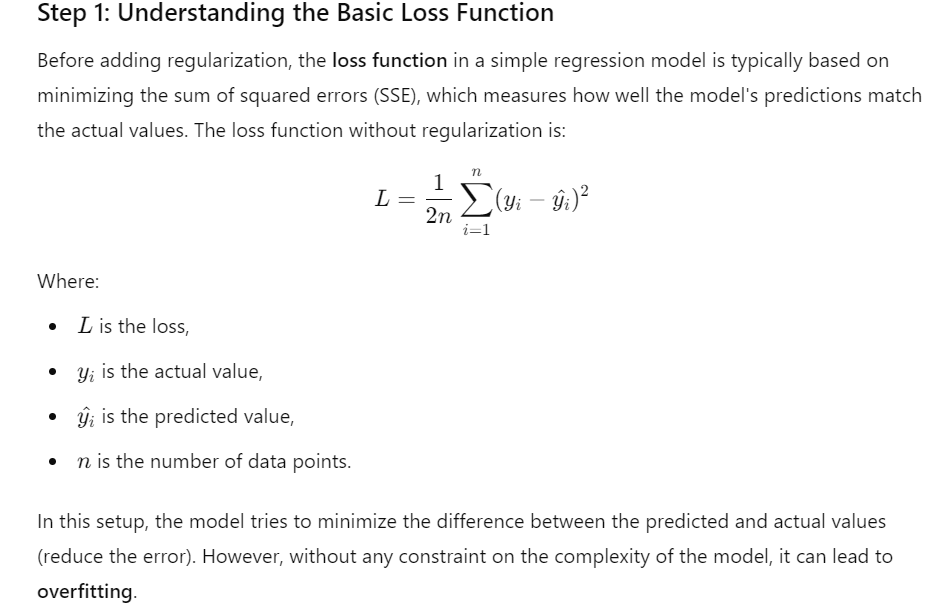

Before Regularization (Overfitting Scenario):
The model focuses solely on minimizing error.

*   It can learn very large weights to fit the training data perfectly.
*   The model becomes overly complex, capturing noise or irrelevant details.
*   Large weight values lead to sharp changes in the model's output for small changes in input, which increases the variance.
*   When exposed to new data (test data), the model performs poorly because it fails to generalize beyond the training data.


Example:

Imagine a polynomial regression model fitting a simple curve. Without regularization, the model might create a wavy line through every point in the training data. While this fits the data exactly, it will likely perform poorly on new, unseen data.

# Adding L1 Regularization (Lasso)

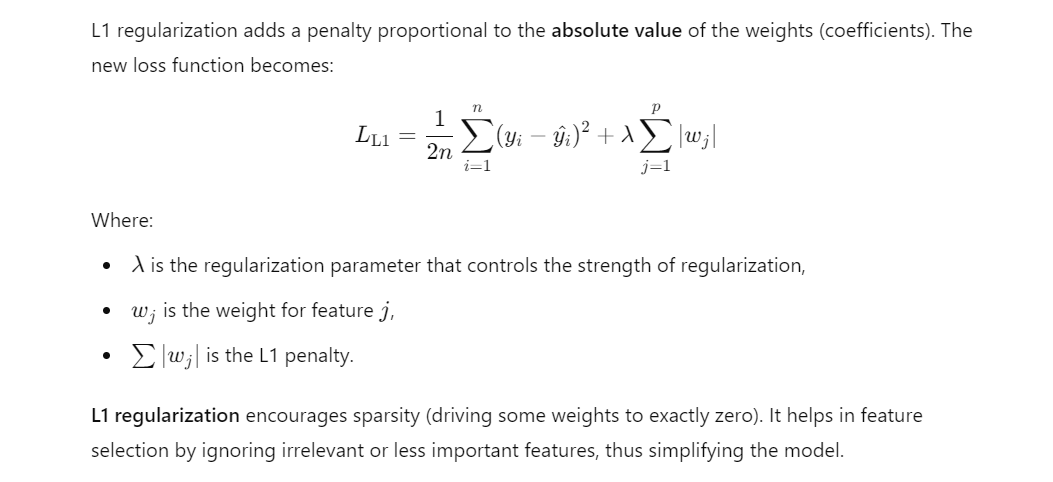

After Adding L1 Regularization (Lasso):


*   The model now balances minimizing both the error and the magnitude of the weights.
*   The penalty on large weights pushes the optimizer to reduce the number of non-zero weights, driving irrelevant feature weights to zero.
*   This leads to a simpler model that generalizes better because it’s less likely to fit noise.
*   Sharper reduction in model complexity helps avoid overfitting.


# Adding L2 Regularization (Ridge)

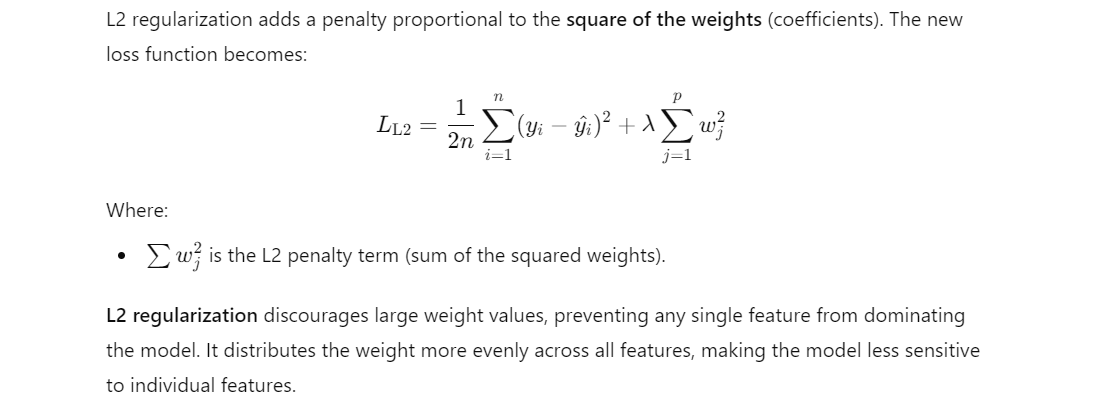

After Adding L2 Regularization (Ridge):


*   The model now penalizes large weights, encouraging the model to use smaller weight values.
*   The squared term grows rapidly for large weights, so large weights get reduced more than small weights, leading to more balanced feature importance.
*   L2 regularization prevents the model from becoming too complex (high variance) while maintaining all the features in some capacity.
*   This leads to smoother models that are less sensitive to changes in input, improving generalization on unseen data.


## Anything model learns is shown through its weights

# Impact on the Weights and Overfitting

Before Regularization:
*   Weights are large and can grow without constraint to perfectly fit the training data.
*   The model overfits, capturing noise and irrelevant patterns.
*   Variance is high because even small changes in the input can lead to large changes in output.

After Adding L1 Regularization:

*   Many weights are driven to zero, selecting only the most relevant features.
*   The model becomes simpler and better at generalizing.
*   Irrelevant features are removed, reducing the risk of overfitting.


After Adding L2 Regularization:

*   Weights are shrunk but not eliminated.
*   The model distributes importance more evenly across features.
*   Smoother model with less sensitivity to individual features, reducing overfitting.

# How Regularization Works with the Optimizer

When you add a regularization term (L1 or L2) to the loss function, the optimizer (like gradient descent) tries to minimize not just the error but also the complexity of the model by adjusting the weights.

For example, in L2 regularization, the loss function becomes:

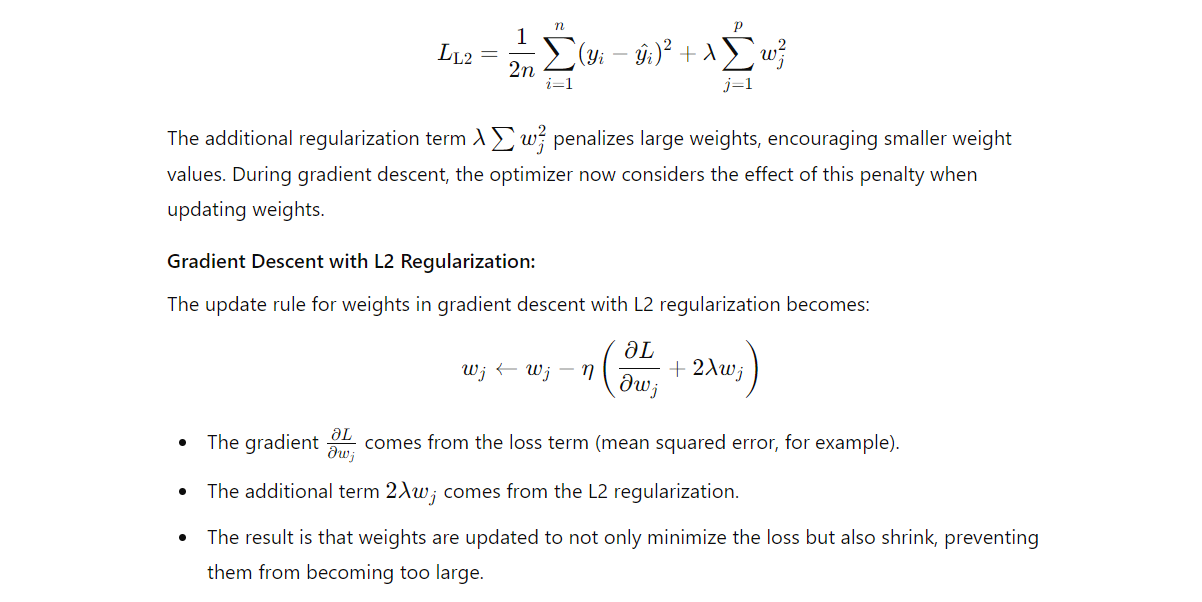

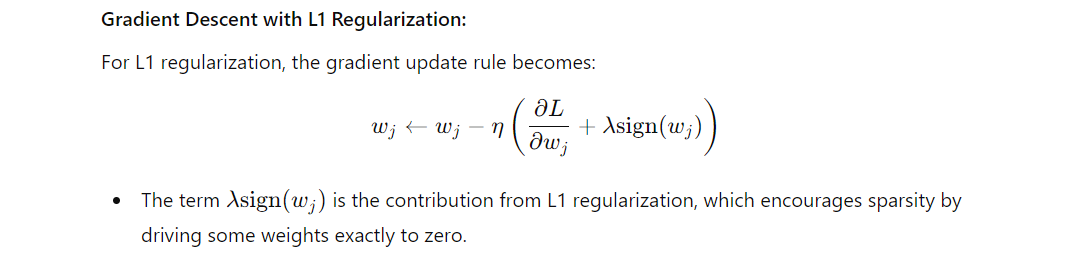

Without regularization, gradient descent will solely minimize the error, potentially leading to overfitting as it can give large weights to some features, leading to more complex models that overfit the training data.

When regularization (L1 or L2) is applied:

*   L1 Regularization: The optimizer will push many weights toward zero, leading to a sparse model that only uses the most important features. This helps in reducing overfitting.
*   L2 Regularization: The optimizer will shrink the weights, discouraging any single feature from having too much influence. This leads to smoother models with smaller weights, reducing the variance and the risk of overfitting.

# Derivative of aboslute function

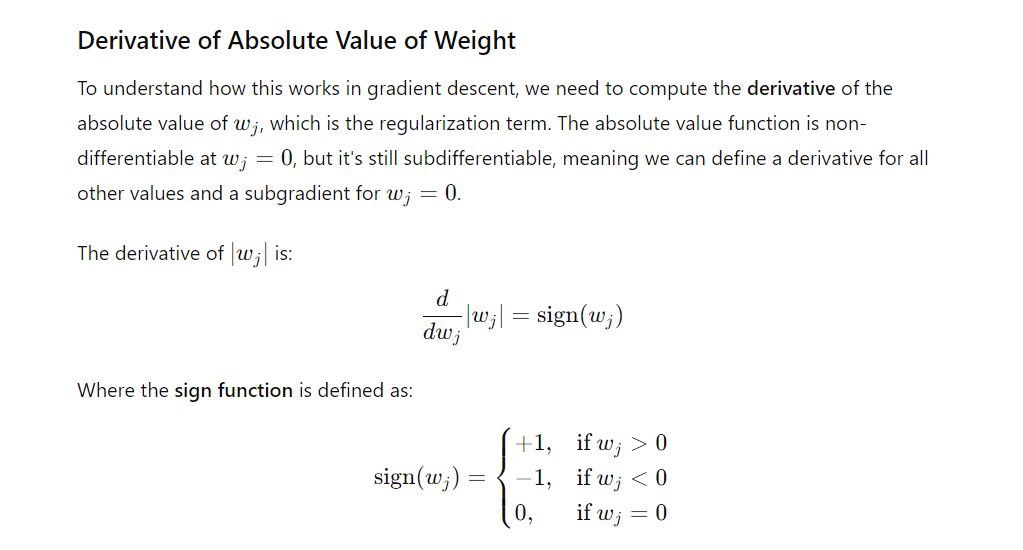

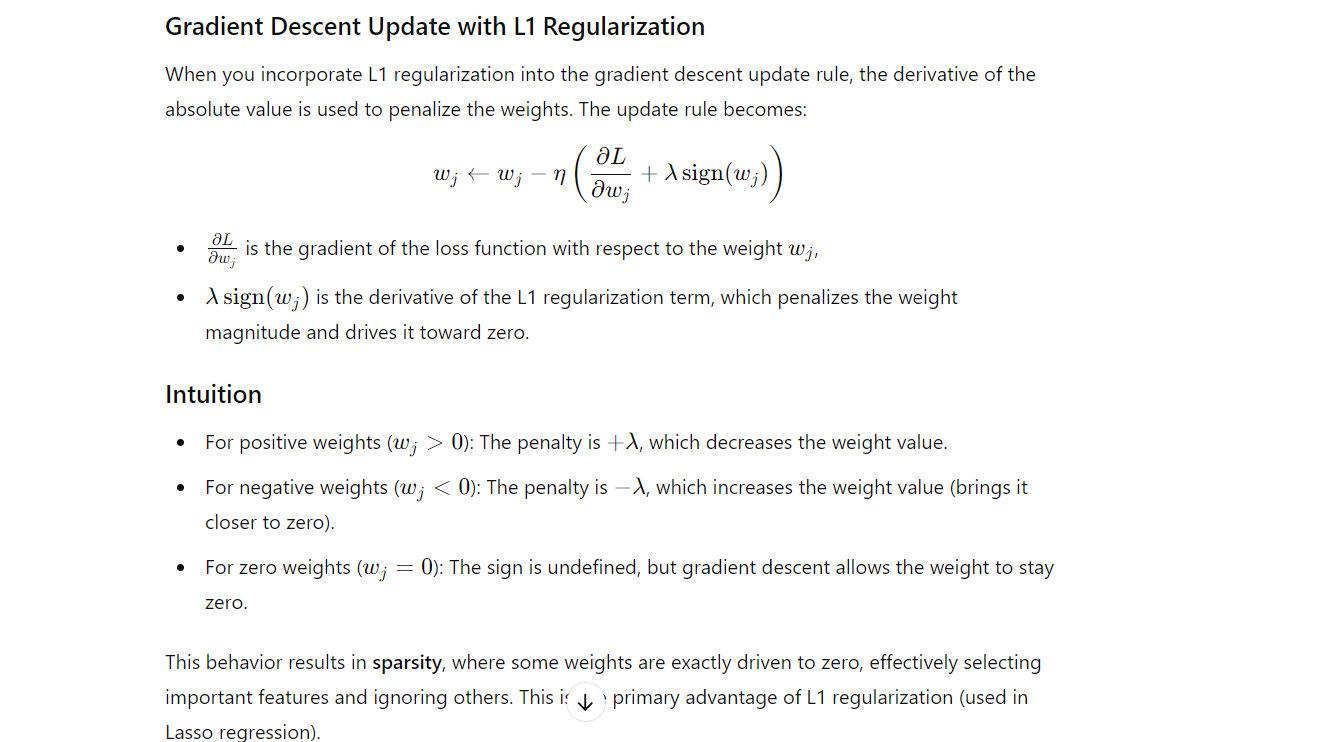

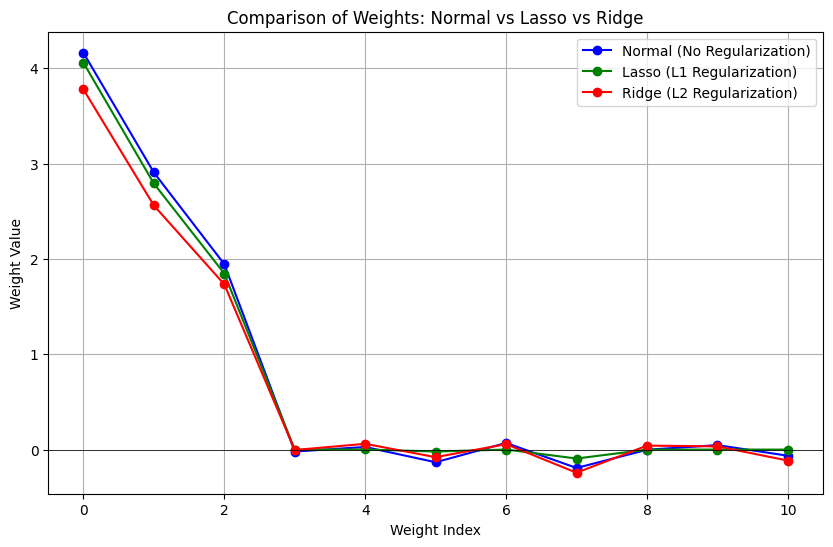

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for regression with more features
np.random.seed(42)
X = np.random.randn(100, 10)  # 10 features instead of 2
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # true weights for X[:, 0] and X[:, 1]

# Add a column of ones to X to represent the bias term
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 for bias term

# Initialize parameters (weights)
theta = np.random.randn(11)  # 10 features + bias

# L1 Regularization (Lasso) function
def compute_loss_L1(X, y, theta, lambda_l1):
    n = len(y)
    y_pred = X.dot(theta)
    error = y_pred - y
    loss = (1 / (2 * n)) * np.sum(error ** 2) + lambda_l1 * np.sum(np.abs(theta))  # L1 regularization term
    return loss

# Gradient Descent with L1 regularization
def gradient_descent_L1(X, y, theta, learning_rate=0.01, n_iterations=1000, lambda_l1=0.1):
    n = len(y)
    for iteration in range(n_iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradients = (1 / n) * X.T.dot(error) + lambda_l1 * np.sign(theta)  # Gradient of L1 regularization
        theta -= learning_rate * gradients
    return theta

# L2 Regularization (Ridge) function
def compute_loss_L2(X, y, theta, lambda_l2):
    n = len(y)
    y_pred = X.dot(theta)
    error = y_pred - y
    loss = (1 / (2 * n)) * np.sum(error ** 2) + (lambda_l2 / 2) * np.sum(theta ** 2)  # L2 regularization term
    return loss

# Gradient Descent with L2 regularization
def gradient_descent_L2(X, y, theta, learning_rate=0.01, n_iterations=1000, lambda_l2=0.1):
    n = len(y)
    for iteration in range(n_iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradients = (1 / n) * X.T.dot(error) + lambda_l2 * theta  # Gradient of L2 regularization
        theta -= learning_rate * gradients
    return theta

# Gradient Descent without regularization
def gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000):
    n = len(y)
    for iteration in range(n_iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradients = (1 / n) * X.T.dot(error)
        theta -= learning_rate * gradients
    return theta

# Apply gradient descent without regularization
theta_initial = np.random.randn(11)
theta_final_normal = gradient_descent(X_b, y, theta_initial.copy(), learning_rate=0.01)

# Apply gradient descent with L1 (Lasso) regularization
theta_final_L1 = gradient_descent_L1(X_b, y, theta_initial.copy(), learning_rate=0.01, lambda_l1=0.1)

# Apply gradient descent with L2 (Ridge) regularization
theta_final_L2 = gradient_descent_L2(X_b, y, theta_initial.copy(), learning_rate=0.01, lambda_l2=0.1)

# Plotting the weights for comparison
plt.figure(figsize=(10, 6))
plt.plot(range(len(theta_final_normal)), theta_final_normal, 'o-', label='Normal (No Regularization)', color='blue')
plt.plot(range(len(theta_final_L1)), theta_final_L1, 'o-', label='Lasso (L1 Regularization)', color='green')
plt.plot(range(len(theta_final_L2)), theta_final_L2, 'o-', label='Ridge (L2 Regularization)', color='red')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Comparison of Weights: Normal vs Lasso vs Ridge')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


# Dropout Regularization

Dropout is a regularization technique where, during each training iteration, random neurons in a layer are "dropped" or "turned off" (i.e., set to zero) with a certain probability, preventing them from participating in forward or backward propagation. This forces the network to learn redundant representations of the data and prevents overfitting. Let's break this down mathematically and conceptually:

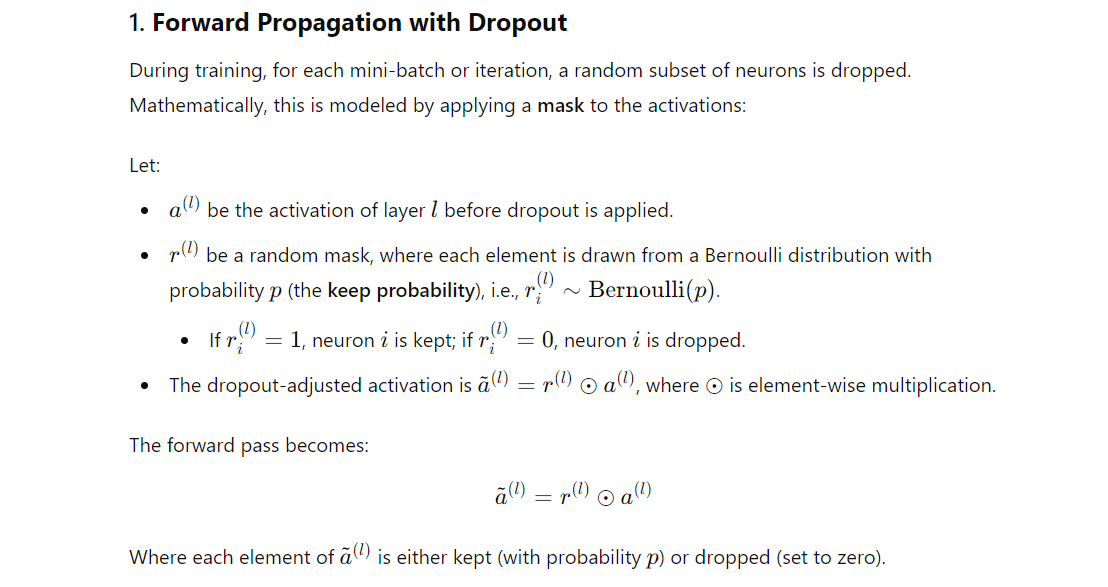

Effect of Dropout in Training

*   The key idea is that the network learns to distribute its learned features across multiple neurons because any neuron might be dropped during training. This leads to less reliance on any individual neuron, reducing overfitting.

*   Without dropout, the network can over-rely on a few neurons (which can overfit), but with dropout, the network must rely on a distributed, more generalized set of weights to make predictions.

How Dropout Prevents Overfitting

*   Dropout combats overfitting by introducing randomness and forcing the network to learn redundant and robust representations:

*   Prevents co-adaptation: Without dropout, neurons might become highly specialized (i.e., overfitting to specific patterns in the training data). Dropout breaks these co-adaptations, as each neuron cannot rely on other specific neurons during training.

*   Improves generalization: Since different subsets of neurons are trained on each mini-batch, the model becomes less sensitive to specific neurons or patterns in the training data, making it more generalized and robust to unseen data.

*   Implicit ensemble: Dropout can be thought of as training an ensemble of different neural networks (each with a different subset of neurons dropped), and at test time, averaging these models to get a more generalized solution.

## Weight Updates During Training with Dropout

During backpropagation, only the neurons that were kept (i.e., not dropped) are updated, while the weights of dropped neurons receive no updates since their contribution is zero in that iteration.

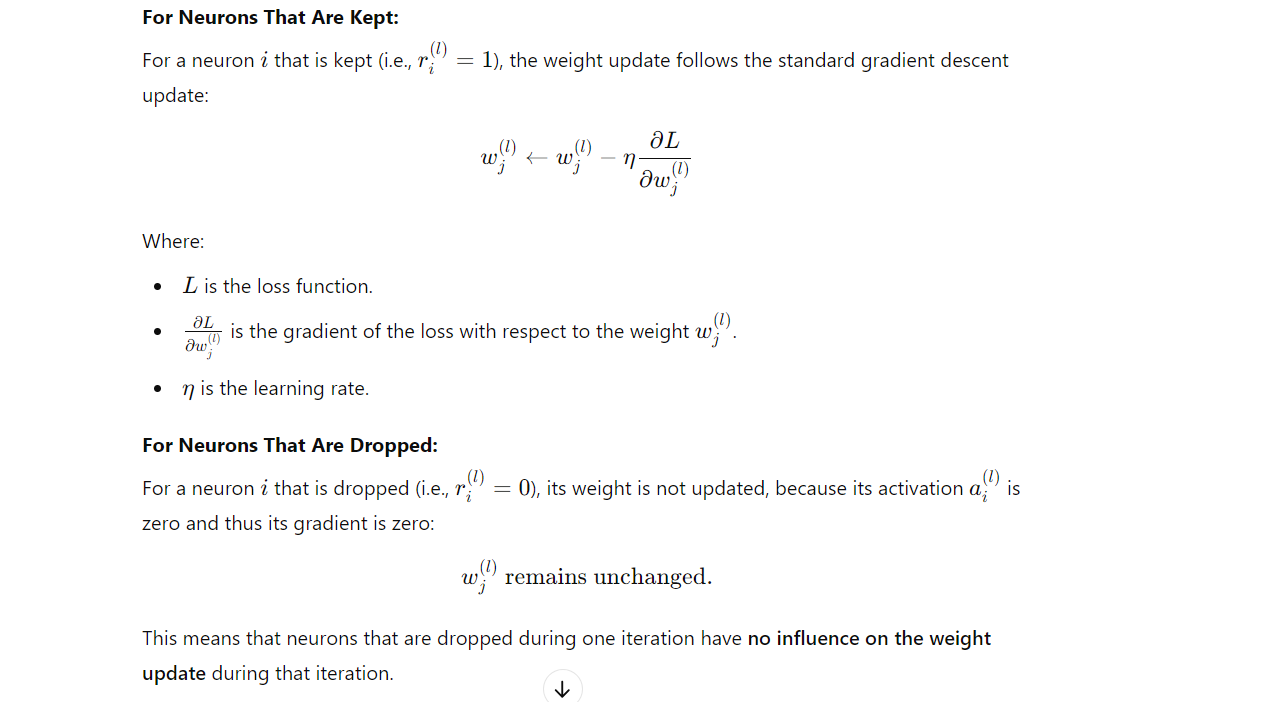

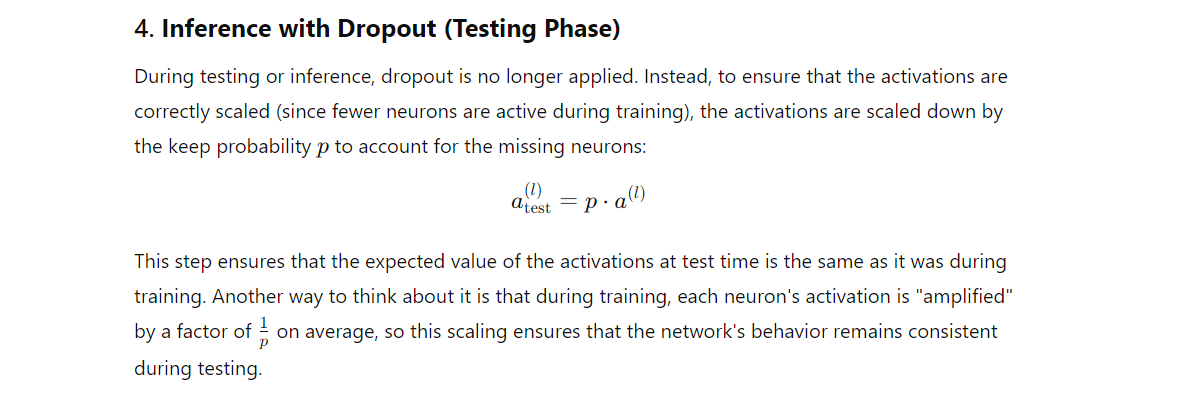

## Dropout Code

The > operator in the line:

*  mask = torch.rand(x.shape) > dropout_rate

is a comparison (greater-than) operator that compares each element of the tensor torch.rand(x.shape) with the value dropout_rate.

Explanation:

torch.rand(x.shape) generates a tensor of random values between 0 and 1, with the same shape as x.
dropout_rate is the probability of dropping a unit (neuron). In your case, it is set to 0.5.

When you use the > operator:

*   Each element of the tensor generated by torch.rand(x.shape) is compared with the value dropout_rate.
*   The result is a binary mask (tensor) where each position will have:
    *  True (or 1) if the random value is greater than the dropout_rate.
    *  False (or 0) if the random value is less than or equal to the dropout_rate.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()  # Call the parent class constructor
        self.fc1=nn.Linear(2,50) # First fully connected layer: input size 2, output size 50
        self.fc2=nn.Linear(50,1) # Second fully connected layer: input size 50, output size 1

    def manual_droput(self,x,dropout_rate=0.5):  # Forward pass: defines how data flows through the network
        if self.training:
            mask = torch.rand(x.shape) > dropout_rate
            scaled_activation = mask/(1-dropout_rate) # Scale activations to keep the expected output unchanged
            return x*scaled_activation
        return x

    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = self.manual_droput(x, dropout_rate=0.5)
        x = self.fc2(x)
        return x

# Generate synthetic data
X = torch.randn(100, 2) # shape will be (no of data points,features) , so here each data point in X has 2 features
y = torch.randn(100, 1) # Shape will be (no of data points,target), targets for data points in X

# Initialize the model, loss function, and optimizer
model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train() # Set the model to training mode
    optimizer.zero_grad()  # Zero out the gradients from the previous step
    outputs = model(X)  # Perform the forward pass: get predictions for the input data
    loss = criterion(outputs, y)  # Compute the loss by comparing predictions with target values
    loss.backward()  # Backpropagate the loss to compute gradients for model parameters
    optimizer.step()  # Update the model parameters based on the gradients

    if epoch % 10 == 0:
        print(f"{epoch} ,  Loss: {loss.item():.4f}")

0 ,  Loss: 1.3061
10 ,  Loss: 1.2419
20 ,  Loss: 1.2199
30 ,  Loss: 1.2767
40 ,  Loss: 1.2442
50 ,  Loss: 1.2256
60 ,  Loss: 1.1980
70 ,  Loss: 1.2075
80 ,  Loss: 1.2136
90 ,  Loss: 1.1573
